# DSFB Assignment 3

In this assignment, you will begine to work with data to build some basic models. 

## IMPORTS

Here are a bunch of libraries that you may need to use...

In [6]:
# Standard imports
import numpy  as np
import pandas as pd

import itertools
import random
import math  

# Plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
%matplotlib inline  
import seaborn as sns
sns.set(style="white")

# ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

# Set a seed for replication
SEED = 1  # Use this anywhere a stochastic function allows you to set a seed

# PART 1: LOGIT MODEL (without sklearn)

Suppose we collect data for a group of students in a course with the following variables:  

    X1 = hours studied  
    X2 = undergrad GPA  
    Y = receive a grade of 4.0  

In [2]:
# Suppose we fit a logit model to the data above and obtain the following coefficients:
b0 = -5
b1 = 0.1
b2 = 1

**PROBLEM**: Estimate the probability that a student who studies for 40 hours, and who has an undergrad GPA of 3.0, will get a 4.0 in the class.

In [3]:
# Estimate the probability and print it out
X1 = 40
X2 = 3.0
y_prob = b0 + X1*b1 + X2*b2

def sigmoid(scores): 
    return 1 / (1 + np.exp(-scores))

print(sigmoid(y_prob))


0.8807970779778823


**PROBLEM**: How many hours would a student who has an undergrad GPA of 3.0 need to study to have an 80% chance of getting a grade of 4.0 in the class? Tip: You can do all of this on paper with math. But then type it into the markdown field below to show your work. Perform the very final (reduced) calculation in python to show the answer.

Show your work here to estimate the number of hours for X1:

  _____0.8 = 1 / (1 + exp( - (-5 + h * 0.1 + 3 * 1 ) )
  
  _____Solving this yields: 
  
  _____h = (2*np.log(2) + 2 ) / 0.1  so h= 33.86

In [17]:
# Use python to manually calculate that value:
h =  (2*np.log(2) + 2 ) / 0.1
print(h)



33.86294361119891


**PROBLEM**: Use your solution from above (along with the estimated logit model coefficients given to you earlier) to show that the logit model would in fact predict a probability of 80%.

Show the calculation (written out, step-by-step) here:  

  __y_prob = b0 + X1*b1 + X2*b2 = 5 + 33.86 * 0.1 + 3.0 * 1 = 1.386
  ___
  __p = 1 / (1 + np.exp(-y_prob) = 0.8
  _____

In [4]:
# Use Python to perform the calculation and show the result:
X1= 33.86
X2= 3.0
y_prob =b0 + X1 *b1 + X2 *b2 

def sigmoid(scores): 
    return 1 / (1 + np.exp(-scores))

print('Probability  =', "{0:.4f}".format(sigmoid(y_prob)))






Probability  = 0.8000


# PART 2: PLOT ROC CURVES (without sklearn)

Suppose you have the following labeled data: for each observation you are given a Positiveor Negative label and the predicted probability. The "Positive" case is labeled as 1, and the "Negative" case is labeled with 0. For example, an observation of (0, 0.45) means the truth value is Negative and the predicted probability of being positive is 0.45.

In [6]:
data = [
    (1, 0.9),
    (0, 0.8),
    (1, 0.6),
    (1, 0.4),
    (0, 0.2)
]


**PROBLEM**: Calculate the True Positive Rate and the False Positive Rate at each observation. You may NOT use `sklearn` or any other supporting library for this problem - you must do everything in "pure Python". 

In [8]:
# Calculate TPR and FPR ???
fpRate= []
tpRate= []

thresholds = np.linspace(0.0, 1.0, num=100)

for t in thresholds:
    tn=0
    fp=0
    fn=0
    tp=0
    for i in range(len(data)):
        y_hat = data[i][1] > t  
        if y_hat==0:
            if y_hat == data[i][0]:
                tn+=1
            else:
                fn+=1
        if y_hat==1:
            if y_hat == data[i][0]:
                tp+=1
            else:
                fp+=1
    fpRate.append(fp/ (fp+tn))
    tpRate.append(tp/ (tp+fn))


**PROBLEM**: Plot an ROC curve. You may NOT use `sklearn` or any other supporting library for this problem - you must do everything in "pure Python". 

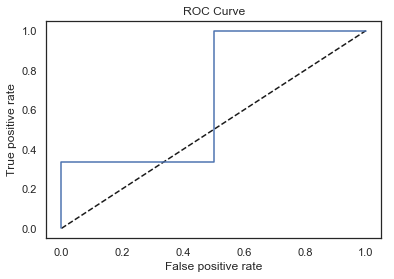

In [9]:
# Plot the ROC Curve
def plot_roc(fpr, tpr, title='ROC Curve', note=''):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    if note: plt.text(0.6, 0.2, note)
    plt.show()

plot_roc(fpRate, tpRate)



# PART 3: AGGLOMERATIVE CLUSTERING (without sklearn)

Suppose you have the following observations in a two-dimensional Euclidean space. Here we give you a dictionary with a label for the point, and the point in (x,y) coordinates. 

In [31]:
# Raw observations
data   = [(1,1), (2,1), (5,1), (7,1), (1,5), (3,4), (4,5) ]
labels = [ 'A',   'B',   'C',   'D',   'E',   'F',   'G']

# Clusters of 1 observation, at lowest level
a = [data[0], ]
b = [data[1], ]
c = [data[2], ]
d = [data[3], ]
e = [data[4], ]
f = [data[5], ]
g = [data[6], ]

[(1, 1)]


You may use the following function to plot the data...

In [11]:
def plot_data(data, labels, xlim, ylim):
    """ Function to plot a list of (x,y) coordinates, with optional lables. 
        
        Args:  
              data     A list of (x,y) point to plot
              labels   A list of text labels, in same order as data.
    """
    
    fig, ax = plt.subplots()
    for point, label in zip(data, labels):
        ax.scatter(point[0], point[1], c='black')
        if labels: ax.annotate(label, point, textcoords="offset points", xytext=(1,10))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True)
    return fig, ax

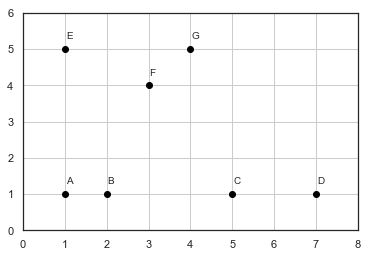

In [12]:
plot_data(data, labels, xlim=(0,8), ylim=(0,6))
pass

**PROBLEM**: Write a custom function in pure Python to calculate the Euclidean straight-line distance between any two points with (x,y) coordinates.

In [42]:
def distance(point_a, point_b):
    """ Function to calculate and return the Euclidean straight distance between any two points with (x,y) coordinates.
        
        Args:  
               point_a   (x,y) of point a
               point_b   (x,y) of point b
    """
    dist = np.sqrt((point_b[1]-point_a[1]) * (point_b[1]-point_a[1]) + (point_b[0]-point_a[0]) * (point_b[0]-point_a[0]))
    return dist
   
    
    

**PROBLEM**: Write a custom function in pure Python to calculate a Euclidean distance matrix between a list of points; return a quasi-matrix as a pure Python "list of lists."

In [43]:
def distance_matrix(points):
    """ Function to calculate the point to point distances between a list of points.
        Return values in a quasi-"matrix" in the pure python form of a list-of-lists.
        
        Args:      
              points      A list of coordinates. For example: [(1,3), (4,9), (5,7)]
    """
    distances = []
    distance_list = []
    
    for point_a in points:
        for point_b in points:
                distance_ = distance(point_a, point_b)
                distances.append(distance_)
                
        distance_list.append(distances)
        distances = []
    return distance_list
    
    

**PROBLEM**: Write a custom function in pure Python to calculate the centroid of a cluster of coordinates.

In [44]:
def centroid(points):
    """ Function to calculate and return the (x,y) coordinates for the centroid of a list of such (x,y) coordinates.
        Args:  
              points      A list of coordinates for the cluster. For example: [(1,3), (4,9), (5,7)]
    """
    points_numbers = len(points)
    x_sum = 0
    y_sum = 0
    
    for point in points:
        x_sum += point[0]
        x_sum += point[1]
        
    return (x_sum/points_numbers, y_sum/points_numbers)
            
    
    

**PROBLEM**: Write a custom function in pure Python to calculate the Euclidean distance between the closest points between two different clusters.

In [45]:
def separation(cluster_a, cluster_b):
    """ Function to calculate and return the Euclidean distance between the closest points between two different clusters.
        
        Args:  
              points      A list of coordinates for the cluster. For example: [(1,3), (4,9), (5,7)]
    """
    min_distance=distance(cluster_a[0], cluster_b[0])
  
    for point_a in cluster_a:
        for point_b in cluster_b:
            distance_ = distance(point_a, point_b)
            if distance_ < min_distance:
                min_distance = distance_
 
    return min_distance
   
    

    

**PROBLEM**: Write a custom function in pure Python to calculate the distortion of a cluster. Define "distortion" as the sum of the squared distances of each point to the centroid of the cluster.

In [46]:
def distortion(points):
    """ Function to calculate and return the distortion of a cluster. 
        Distortion is defined as the sum of the squared distances of each point to the centroid of the cluster.
        
        Args:  
              points      A list of coordinates for the cluster. For example: [(1,3), (4,9), (5,7)]
    """
    distortion = 0
    center =  centroid(points)
    for point_a in points:
        for point_b in points:
            distortion += distance(point_a, point_b)
        
    return distortion

    

**PROBLEM**:  Use the custom distance_matrix() function coded above to calculate the distance matrix between all observations. Try to print this out in a readable format (optional).

In [47]:
# Calc and print distance matrix between all observations
distance_matrix = distance_matrix(data)
for dist in distance_matrix:
    print(dist)

[0.0, 1.0, 4.0, 6.0, 4.0, 3.605551275463989, 5.0]
[1.0, 0.0, 3.0, 5.0, 4.123105625617661, 3.1622776601683795, 4.47213595499958]
[4.0, 3.0, 0.0, 2.0, 5.656854249492381, 3.605551275463989, 4.123105625617661]
[6.0, 5.0, 2.0, 0.0, 7.211102550927978, 5.0, 5.0]
[4.0, 4.123105625617661, 5.656854249492381, 7.211102550927978, 0.0, 2.23606797749979, 3.0]
[3.605551275463989, 3.1622776601683795, 3.605551275463989, 5.0, 2.23606797749979, 0.0, 1.4142135623730951]
[5.0, 4.47213595499958, 4.123105625617661, 5.0, 3.0, 1.4142135623730951, 0.0]


**PROBLEM**: We started with seven "clusters" with one observation in each cluster. Now use hierarchical agglomerative clustering to fuse the data together (going from the bottom up). Use the distance matrix above to help you perform this step. You may do it manually (by inspecting the matrix) or you may do it programmatically. Once you decide the proper order of fusing clusters, make variable assignments by updating the code below.

In [48]:
# Define the next 6 clusters by defining a variable that holds a list of all the points in that cluster
clust1 = [data[0], data[1]]
clust2 = [data[2], ]
clust3 = [data[3], ]
clust4 = [data[4], ]
clust5 = [data[5], ]
clust6 = [data[6], ]

**PROBLEM**: Summarize the clustering process by printing out values for the items in the cluser, the separation distance between the old relevant clusters before fusing, the internal distortion within the new cluster after fusing, and the members of the new cluster after fusing.

In [51]:
# Print out the following values for each of the clusters with 2 or more observations in them
print('CLUSTER'.center(10), 'DISTANCE'.center(10), 'DISTORTION'.center(20), 'MEMBERS')

print('1'.center(10), str(separation(a,b)).center(10), str(distortion(clust1)).center(20), 'A+B')
print('2'.center(10), '0'.center(10), '0'.center(20), 'C')
print('3'.center(10), '0'.center(10), '0'.center(20), 'D')
print('4'.center(10), '0'.center(10), '0'.center(20), 'E')
print('5'.center(10), '0'.center(10), '0'.center(20), 'F')
print('6'.center(10), '0'.center(10), '0'.center(20), 'G')

 CLUSTER    DISTANCE       DISTORTION      MEMBERS
    1         1.0             2.0          A+B
    2          0               0           C
    3          0               0           D
    4          0               0           E
    5          0               0           F
    6          0               0           G


**PROBLEM**: Plot the data again, but this time also plot a rectangle around each cluster, fusing clusters upward until everything is in just one cluster. TIP: You can use the plot_data() function from before, and the plot_cluster() function below, to help you with the plotting.

In [52]:
# You can use this function to add an illustrative box around a given cluster of points in a plot
def plot_cluster(ax, cluster):
    """ Function to add an illustrative box around a given cluster of points in a plot.
    
        Args:  
              ax        An axis object from calling plt.subplots() in matplotlib
              cluster   A list of coordinates for the cluster. For example: [(1,3), (4,9), (5,7)]
    """
    padding = len(cluster)**2 * 0.05
    min_x   = min([x for (x,y) in cluster]) - 0.5 - padding
    max_x   = max([x for (x,y) in cluster]) - 0.5 + padding
    min_y   = min([y for (x,y) in cluster]) - 0.5 - padding
    max_y   = max([y for (x,y) in cluster]) - 0.5 + padding
    width   = max_x - min_x + 1  
    height  = max_y - min_y + 1.25  
    ax.add_patch(patches.Rectangle((min_x,min_y), width, height, linewidth=2, edgecolor='r',facecolor='none'))

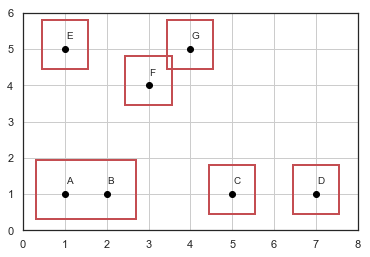

In [59]:
# Plot the Data and plot a box around each hierarchical cluster
fig, ax = plot_data(data, labels, xlim=(0,8), ylim=(0,6))
n_cluster = 6
for i in range(6):
    clust = eval('clust'+str(i+1)) 
    plot_cluster(ax, clust)
    



**PROBLEM**: Using the data you have calculated above, now plot a dendogram below. You may do this manually usinge the `images/A3-Fig-2.png` file and editing it in an image editing program (save your edits to that file, and commit changes to your repository). Or try to use special functions in matplot lib to plot it directly.

<img src="images/dendogram.png" width="800" height="800" align="center"/>

**PROBLEM**: Using your dendogram, report which observations would be grouped together if you had three clusters.

Cluster 1: ___A , B_________ 

Cluster 2: ___E , F, G_________ 

Cluster 3: ___C, D_________

**PROBLEM**: Using your dendogram, report which observations would be grouped together if you had five clusters.

Cluster 1: ____A, B________ 

Cluster 2: ___C_________ 

Cluster 3: _____D_______

Cluster 4: __E__________

Cluster 5: ___F, G_________

# **PART 4**: NOW WE RETURN TO CREDIT DEFAULT PREDICTIONS AS IN ASSIGNMENT 2
Repeat the analysis using a logit model. You can start with the code below, as it shows you how to setup, fit, and predict with a logit model in sklearn.

We now return to the problem of trying to predict the probability of defaulting on a credit card account at a Taiwanese bank. A credit card default happens when a customer fails to pay the minimum due on a credit card bill for more than 6 months. 

We will use a dataset from a Taiwanese bank with 30,000 observations (Source: *Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*). Each observation represents an account at the bank at the end of October 2005.  We renamed the variable default_payment_next_month to customer_default. The target variable to predict is `customer_default` -- i.e., whether the customer will default in the following month (1 = Yes or 0 = No). The dataset also includes 23 other explanatory features. 

Variables are defined as follows:

| Feature name     | Variable Type | Description 
|------------------|---------------|--------------------------------------------------------
| customer_default | Binary        | 1 = default in following month; 0 = no default 
| LIMIT_BAL        | Continuous    | Credit limit   
| SEX              | Categorical   | 1 = male; 2 = female
| EDUCATION        | Categorical   | 1 = graduate school; 2 = university; 3 = high school; 4 = others
| MARRIAGE         | Categorical   | 0 = unknown; 1 = married; 2 = single; 3 = others
| AGE              | Continuous    | Age in years  
| PAY1             | Categorical   | Repayment status in September, 2005 
| PAY2             | Categorical   | Repayment status in August, 2005 
| PAY3             | Categorical   | Repayment status in July, 2005 
| PAY4             | Categorical   | Repayment status in June, 2005 
| PAY5             | Categorical   | Repayment status in May, 2005 
| PAY6             | Categorical   | Repayment status in April, 2005 
| BILL_AMT1        | Continuous    | Balance in September, 2005  
| BILL_AMT2        | Continuous    | Balance in August, 2005  
| BILL_AMT3        | Continuous    | Balance in July, 2005  
| BILL_AMT4        | Continuous    | Balance in June, 2005 
| BILL_AMT5        | Continuous    | Balance in May, 2005  
| BILL_AMT6        | Continuous    | Balance in April, 2005  
| PAY_AMT1         | Continuous    | Amount paid in September, 2005
| PAY_AMT2         | Continuous    | Amount paid in August, 2005
| PAY_AMT3         | Continuous    | Amount paid in July, 2005
| PAY_AMT4         | Continuous    | Amount paid in June, 2005
| PAY_AMT5         | Continuous    | Amount paid in May, 2005
| PAY_AMT6         | Continuous    | Amount paid in April, 2005

The measurement scale for repayment status is:   

    -2 = payment two months in advance   
    -1 = payment one month in advance   
    0 = pay duly   
    1 = payment delay for one month   
    2 = payment delay for two months   
    3 = payment delay for three months   
    4 = payment delay for four months   
    5 = payment delay for five months   
    6 = payment delay for six months   
    7 = payment delay for seven months   
    8 = payment delay for eight months   
    9 = payment delay for nine months or more  

### **Setup AGAIN**  

We purposefully have two different setup sections for this assignment. In the sections above you could not use sklearn, so we did not want to import those libraries. Now you CAN use sklearn.

**From now on in this assignment, you CAN use sklearn !**

### Imports

In [1]:
# Standard imports
import numpy  as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import itertools
import pandas_profiling

# Plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline  
import seaborn as sns
sns.set(style="white")

# scikit-learn
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import GradientBoostingClassifier

# Supporting functions from scikit-learn
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree            import export_graphviz
from sklearn.decomposition   import PCA

# ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

### Constants

In [2]:
# Set a seed for replication
SEED = 1

### Custom Functions

We will also define a few "helper functions" to automate repetitive tasks that we will perform below.

In [3]:
def plot_confusion_matrix(cm, classes=[0,1], normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds):
    """ 
    Function to plot a sklearn confusion matrix, showing number of cases per prediction condition 
    
    Args:
        cm         an sklearn confusion matrix
        classes    levels of the class being predicted; default to binary outcome
        normalize  apply normalization by setting `normalize=True`
        title      title for the plot
        cmap       color map
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round (cm[i, j],2), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [4]:
def plot_roc(fpr, tpr, title='ROC Curve', note=''):
    """
    Function to plot an ROC curve in a consistent way.
    
    Args:
        fpr        False Positive Rate (list of multiple points)
        tpr        True Positive Rate (list of multiple points)
        title      Title above the plot
        note       Note to display in the bottom-right of the plot
    """
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    if note: plt.text(0.6, 0.2, note)
    plt.show()

In [5]:
def print_feature_importance(tree_model, feature_names):
    """
    Function to print a list of features from an sklearn tree model (ranked by importance of the feature)
    
    Args:
        tree_model       A sklearn DecisionTreeClassifier()
        feature_names    A list of features used by the DecisionTreeClassifier
    """
    print('Feature'.center(12), '   ',  'Importance')
    print('=' * 30)
    for index in reversed(np.argsort(tree_model.feature_importances_)):
        print(str(feature_names[index]).center(12) , '   ', '{0:.4f}'.format(tree_model.feature_importances_[index]).center(8)) 

### **Load and Preprocess Data**

In [6]:
# Load Data
data = pd.read_csv('data/credit_data.csv')

# One-hot-encode SEX and MARRIAGE  
data = pd.get_dummies(data=data, columns=['SEX', 'MARRIAGE'])

# Sort Columns alphabetically
data = data.reindex(sorted(data.columns), axis=1)

# Move target variable to first column (not necessary, but easier to see)
data = data.set_index('customer_default').reset_index() 

# Select target
y = np.array(data['customer_default'])

# Select features 
features = list(set(list(data.columns)) - set(['customer_default']))
X = data.loc[:, features]

## A Discussion of Models and Results from Assignment 2...

What might we do to improve our prediction models from Assignment 2?

**Accuracy?**

To improve the accuracy, we can select only the most relevant features to use for the logit model

**PROBLEM**: Note that the logit model in Assignment 2 did WORSE than the baseline model in Assignment 2 (at least when predicting class labels with a default probability threshold and when evaluated by the total number of errors made by the model). Using accuracy to compare models, however, as two drawbacks for the credit default problem. Describe those problems and potential solutions.

ANSWER: ____Accuracy does not take into account the difference in cost of a false positive or a false negative. A solution can be to add an importance weight to one or the other. 
Accuracy is also a problem for imbalanced data. A solution can be to again weight a class differently than the other.



**PROBLEM**: When do we need to standardize data?

ANSWER: ____It is important to standardize the data so that all features can contribute the same way.____ 



**PROBLEM**: When do we need to use a _Pipeline_? (And what is an sklearn Pipeline, anyway?) TIP: You will need to do some self-directed learning about pipelines in sklearn...

ANSWER: ___We should use pipeline when we need to assemble several steps that will be cross-validated together while setting different parameters._____ 


**PROBLEM**: Was our training/testing method in Assignment 2 robust? What would make it more robust?

ANSWER: _It was not robust, because comparing models with every time the same testing set is a way overfitting too.
We gain knowledge from the test set by making model comparisions. To make it more robust, we can make an additional validation set to compare models and than only test the test set once.


**PROBLEM**: For all of the problems that follow, divide the data into three parts:  **training** (60%), **validation** (20%) and **test** (20%). In the python code, refer to those subsets as: 

| Subset      |  Pct.  |  X code var     | Target code var |
|-------------|--------|-----------------|-----------------|
| training    |  60%   |  X_train_train  | y_train_train
| validation  |  20%   | X_train_val     | y_train_val
| testing     |  20%   | X_test          | y_test


In [7]:
# Use the sklearn train_test_split() function to split data into "train", "validation", and "test" 

X_train, X_test, y_train, y_test                        = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

X_train_train, X_train_val, y_train_train, y_train_val  =train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)


# **PART 5**: Logit Model with L1 Regularization ("Lasso")
Predict credit default using a logit model. We give you a start with the code below, as it shows you how to setup, fit, and predict with a pipeline in sklearn.

In [14]:
# Build pipeline   
estimators = []
estimators.append(('standardize', StandardScaler()))         # tell it to standardize features
estimators.append(('logit_model_l1', LogisticRegression()))  # tell it to use a logit model
pipeline = Pipeline(estimators) 
pipeline.set_params(logit_model_l1__penalty='l1')            # tell it to regularize with L1 norm

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logit_model_l1',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Tune for the optimal amount of regularization (the tuning parameter `c` in sklearn). We will again give you this code to show you the general pattern for how to setup hyper-parameter tuning in sklearn.

In [68]:
# Tune C  
results = []
for c in np.logspace(-4, 5, 10):
    pipeline.set_params(logit_model_l1__C=c) 
    pipeline.fit(X_train_train,y_train_train)
    y_train_pred = pipeline.predict_proba(X_train_val)       # use validation set during hyper-parameter tuning
    auc_lml1 = roc_auc_score(y_train_val, y_train_pred[:,1])   
    results.append( (auc_lml1, c)  )
logit_model_l1 = pipeline.named_steps['logit_model_l1']      # capture model so we can use it later

**PROBLEM**: Make a table of the results from hyper-parameter tuning so you can inspect them. 

In [69]:
# View results 
for result in results:
    print(result[0], end = '')
    print("        ", end = '')
    print(result[1])


0.5        0.0001
0.6891510353614723        0.001
0.715884239996607        0.01
0.7201081877630493        0.1
0.7208451572317105        1.0
0.7208988576328185        10.0
0.720905469393916        100.0
0.7209054693939161        1000.0
0.720905469393916        10000.0
0.7209036955067922        100000.0


**PROBLEM**: Pick what you believe to be the "best" value for c. Justify your selection. 

In [70]:
# Select best C  
C=0
res=0
for result in results:
    if (result[0] > res):
        res = result[0]
        C = result[1]
print(C)


1000.0


ANSWER: ____The best value of C is 1000_so lambda = 1/1000___ 







**PROBLEM**: Test the final model, using the selected best value for C. Report the final testing score and plot the ROC.

auc score:  0.7231254084979837


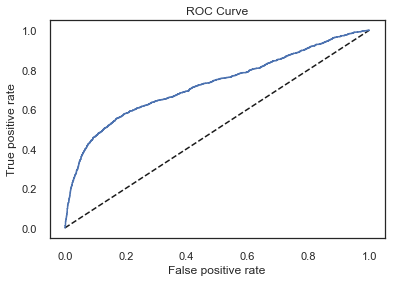

In [17]:
# Test final model 
pipeline.set_params(logit_model_l1__C=1000) 
pipeline.fit(X_train_train,y_train_train)
logit_model_l1 = pipeline.named_steps['logit_model_l1'] 
y_test_pred = pipeline.predict_proba(X_test)       
auc_lml1 = roc_auc_score(y_test, y_test_pred[:,1]) 

fpr, tpr, _ = roc_curve(y_test, y_test_pred[:,1])
print("auc score: ", auc_lml1)
plot_roc(fpr, tpr, title='ROC Curve', note='')




**PROBLEM**: Compare coefficients between a standard logit model and a regularized logit model, to see how Lasso drops predictors.

In [72]:
# Compare coefficients between a standard logit model and a regularized logit model, to see how Lasso drops predictors
model = LogisticRegression().fit(X_train_train,y_train_train)

normal_coef = model.coef_[0]
lasso_coef = logit_model_l1.coef_[0]

for i in range(len(lasso_coef)):
    print(normal_coef[i], end = '')
    print("        ", end = '')
    print(lasso_coef[i])


0.00803367282479073        0.09105526610920317
0.0008335521064219302        0.007443481488010087
6.3904715744510565e-06        0.22821226299708083
-8.95750821592692e-06        -0.4213478544025465
-0.0015523514265607494        0.04054920078366843
1.2372121066400635e-06        0.006190151620460753
-5.885671775925504e-06        -0.03596531632538334
-2.4952752735358028e-05        -0.33929956996314203
-0.01114591786070875        0.06312105456868274
-2.969081857698965e-06        -0.09846655792150368
-7.228551838118343e-06        -0.06452467772935176
-1.1576092229231169e-05        0.011579007911356135
0.006364561089100932        0.041819887979569766
2.1019778466900865e-06        0.01668355960444947
-4.001333900141396e-05        -0.0704523247324593
-1.8291875334530375e-06        -0.018705730890667818
-6.058692597627745e-06        -0.04112076920469765
2.1238385699613184e-06        0.08888435419771011
0.00032591933601532904        0.09285954949290696
4.316790620726256e-06        -0.0044803416900

**PROBLEM**: Comment on which predictors dropped, and why. HINT: Maybe plot a fast-and-rough correlation matrix to test a hunch if you have a hunch.

In [58]:
# Compute correlations
correlation_dict = {}

for column in X_train_train:
    correlation_dict[column] = abs(np.corrcoef(X_train_train[str(column)], y_train_train)[1][0])
    
def dict_val(x):
    return x[1]
sorted_x = sorted(correlation_dict.items(), key=dict_val)

for i in range(len(sorted_x)):
    print(sorted_x[i])

('ID', 0.005756950296729621)
('BILL_AMT6', 0.010005744462965841)
('BILL_AMT5', 0.010366652534622031)
('MARRIAGE_3', 0.01110790176007796)
('BILL_AMT4', 0.012536543787112038)
('AGE', 0.013754397869644748)
('BILL_AMT2', 0.014712344973575249)
('BILL_AMT3', 0.016418824380960508)
('MARRIAGE_0', 0.017042860397577415)
('BILL_AMT1', 0.019114413769544685)
('MARRIAGE_1', 0.025346342585301856)
('MARRIAGE_2', 0.025950034478386726)
('EDUCATION', 0.03871894021246499)
('SEX_1', 0.04123625728667557)
('SEX_2', 0.04123625728667563)
('PAY_AMT6', 0.05395390115598078)
('PAY_AMT3', 0.054337931169608764)
('PAY_AMT4', 0.05543000013807993)
('PAY_AMT5', 0.05816931088357242)
('PAY_AMT2', 0.059795931363002056)
('PAY_AMT1', 0.07538822148510665)
('LIMIT_BAL', 0.15477724428447007)
('PAY_6', 0.1800249770891651)
('PAY_5', 0.19808136963266929)
('PAY_4', 0.20921856140660577)
('PAY_3', 0.23219244794447275)
('PAY_2', 0.264848788951541)
('PAY_1', 0.3254809477502376)


ANSWER: _____In our case (for the best value of C), no predictors were dropped. C=1000 corresponds to lambda = 0.001 which does not impact the features much.__
But we can see by the correlation that the Repaymement status has by far the most influence on the defaulting probability._ 








# **PART 6**: PCA
As an interesting learning exercise, visualize ALL your data in 2 dimensions using PCA. PCA is only able to capture linear variations in the data. For non-linear projections, one could also use T-SNE. However, T-SNE has more tunable parameters compared to PCA.

**PROBLEM**: Use the sklearn StandardScaler() to standardize all of your features.

In [74]:
# Standardize ALL features
scaler = StandardScaler()
scaler.fit(X_train_train)
data = scaler.transform(X_train_train)


**PROBLEM**: Use the sklearn PCA() function to project ALL features into just two dimensions.

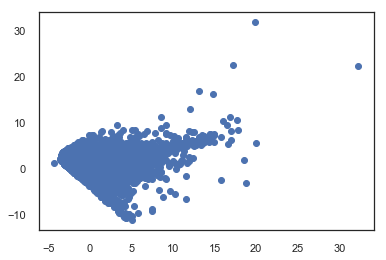

In [77]:
# Project features into two dimensions
pca = PCA(n_components=2, svd_solver='full')
pca.fit(data)
data_pca = pca.transform(data)
plt.scatter(data_pca[:, 0], data_pca[:, 1])


**PROBLEM**: Explore the relationship between the AUC from a standard Logit Model (withOUT using Lasso) and the number of PCA Component Features being used as predictors in the model. In other words, build a `for` loop that tries many numbers of components from PCA in a basic Logit Model.  

Hint: you will need to use code like the following in order to build up a pipeline comprised of the StandardScaler(), PCA(), and LogisticRegression() steps.

    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('pca', PCA()))
    estimators.append(('model', LogisticRegression()))
    pipeline = Pipeline(estimators)
    

In [111]:
# Explore and print out results for the relationship between AUC and the number of PCA Component Features
estimators = []
estimators.append(('standardize', StandardScaler()))         # tell it to standardize features
estimators.append(('pca', PCA()))
estimators.append(('logit_model_pca', LogisticRegression())) 
pipeline = Pipeline(estimators) 

num_features = 28
# Tune n of pca 
results = []
for k in range(num_features):
    if k>0:
        pipeline.set_params(pca__n_components = k) 
        pipeline.fit(X_train_train,y_train_train)
        y_train_pred = pipeline.predict_proba(X_train_val)       # use validation set during hyper-parameter tuning
        auc_lml1 = roc_auc_score(y_train_val, y_train_pred[:,1])   
        results.append( (auc_lml1, k) )
logit_model_pca = pipeline.named_steps['logit_model_pca']  

for result in results:
    print(result[0], end = '')
    print("        ", end = '')
    print(result[1])


**PROBLEM**: Plot your incremental results (increasing levels of components) from the steps above.

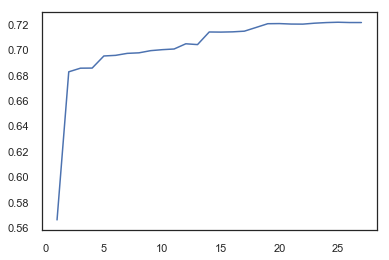

In [119]:
# Plot your incremental results (increasing levels of components) from the steps above.
res_tab=[]
k_tab=[]
for res, k in results:
    res_tab.append(res)
    k_tab.append(k)

plt.plot(k_tab, res_tab)



# **PART 7**:  K-Nearest Neighbors (KNN)

Again to help you get going, we will set up a basic pipeline for hyperparameter tuning K for you...

In [78]:
# Build pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('knn_model', KNeighborsClassifier()))
pipeline = Pipeline(estimators) 


**PROBLEM**: Tune the KNN model to find the optimal K.

In [79]:
# Tune K
results = []
K=1
while K < 100:
    pipeline.set_params(knn_model__n_neighbors=K) 
    pipeline.fit(X_train_train,y_train_train)
    y_train_pred = pipeline.predict_proba(X_train_val)       
    auc_lml1 = roc_auc_score(y_train_val, y_train_pred[:,1])   
    results.append( (auc_lml1, K) )
    K += 10

    
# View results 
for result in results:
    print(result[0], end = '')
    print("        ", end = '')
    print(result[1])


0.6067832476035188        1
0.7214051411441669        11
0.7313105268428631        21
0.7400769157456835        31
0.742185503117123        41
0.7410991585163273        51
0.7451427342147832        61
0.7454153484132015        71
0.745219737042198        81
0.7451546676372518        91


**PROBLEM**: What was the best K?

In [80]:
# Select best K
K_best=0
res=0
for result in results:
    if (result[0] > res):
        res = result[0]
        K_best = result[1]
print(K_best)


71


**PROBLEM**: Test your final model and report the AUC.

In [81]:
# Test final model 
pipeline.set_params(knn_model__n_neighbors=K_best) 
pipeline.fit(X_train_train,y_train_train)
y_test_pred = pipeline.predict_proba(X_test)       
auc_knn = roc_auc_score(y_test, y_test_pred[:,1]) 
print(auc_knn)

0.7513748834677108


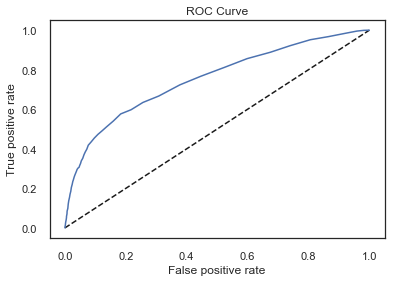

In [82]:
# Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_test_pred[:,1])
plot_roc(fpr, tpr, title='ROC Curve', note='')



# **PART 8**: Decision Trees

Unlike a logit model or a KNN classifier, decision trees are not sensitive to the scaling of categorical features and numeric features. They can find a cut point in arbitrary numeric or categorical features. The implementation of decision trees in sklearn, however, does require categorical features to be one-hot-encoded, even though that is technically not required by the algorithm.

**PROBLEM**: Fit just one tree using the `DecisionTreeClassifier()` function from sklearn. There is no need to use a pipeline for this step, as it is just one tree.

In [41]:
# Fit a one-tree Model     
model_tree = DecisionTreeClassifier().fit(X_train_train,y_train_train)



**PROBLEM**: Test the model and report the AUC. HINT: Make sure you are using the test sets every time you do a final test!

In [45]:
# Test model
y_test_tree = model_tree.predict_proba(X_test) 
auc_tree = roc_auc_score(y_test, y_test_tree[:,1]) 
print(auc_tree)



0.597949047833834


**PROBLEM**: Plot the resulting ROC.

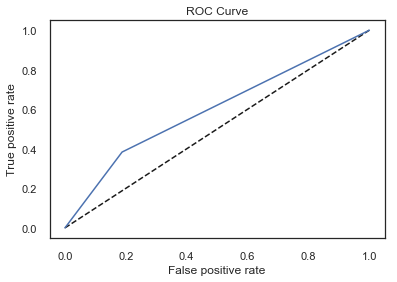

In [43]:
# Plot the ROC
fpr, tpr, _ = roc_curve(y_test, y_test_tree[:,1])
plot_roc(fpr, tpr, title='ROC Curve', note='')



**PROBLEM**: Use the `print_feature_importance()` function given to you above to print the relative feature importances of this model.

In [52]:
# Print feature importance
print_feature_importance(model_tree, list(X_test.columns))



  Feature        Importance
   PAY_1          0.1588 
     ID           0.0846 
    AGE           0.0660 
 BILL_AMT1        0.0595 
  PAY_AMT3        0.0524 
 LIMIT_BAL        0.0517 
 BILL_AMT6        0.0437 
  PAY_AMT4        0.0433 
  PAY_AMT2        0.0430 
  PAY_AMT6        0.0411 
  PAY_AMT1        0.0410 
  PAY_AMT5        0.0407 
 BILL_AMT2        0.0386 
 BILL_AMT3        0.0383 
 BILL_AMT5        0.0382 
   PAY_2          0.0379 
 BILL_AMT4        0.0367 
 EDUCATION        0.0161 
   PAY_4          0.0115 
   PAY_5          0.0099 
   PAY_6          0.0093 
   SEX_1          0.0089 
   PAY_3          0.0085 
   SEX_2          0.0076 
 MARRIAGE_1       0.0060 
 MARRIAGE_2       0.0047 
 MARRIAGE_3       0.0014 
 MARRIAGE_0       0.0005 


# **PART 8**: Random Forests

Just one tree may be an arbitrary and unreliable model. So next, use the `RandomForestClassifier()` model from sklearn to run a random forest of trees and average across them.

**PROBLEM**: Build a pipeline for a random forest.

In [8]:
# Build pipeline
estimators = []
estimators.append(('forest_model', RandomForestClassifier()))
pipeline = Pipeline(estimators) 


**PROBLEM**: Tune for N, the number of trees and print out the results so you can find the best N.

In [13]:
# Tune N   
n = [1, 10, 100, 1000, 10000]
results = []
for N in n:
    pipeline.set_params(forest_model__n_estimators=N) 
    pipeline.fit(X_train_train,y_train_train)
    y_train_pred = pipeline.predict_proba(X_train_val)       
    auc_forest = roc_auc_score(y_train_val, y_train_pred[:,1])   
    results.append( (auc_forest, N) )

# View results 
for result in results:
    print(result[0], end = '')
    print("        ", end = '')
    print(result[1])

Best_N=0
res=0
for result in results:
    if (result[0] > res):
        res = result[0]
        Best_N = result[1]
print(Best_N)

0.6049038948272        1
0.7231607249779917        10
0.7669926694920927        100
0.7743398680647263        1000
0.7743679277337737        10000
10000


**PROBLEM**: Test the model and report the AUC. HINT: Make sure you are using the test sets every time you do a final test!

In [15]:
# Test final model
model_forest = RandomForestClassifier(n_estimators=Best_N).fit(X_train_train,y_train_train)
y_test_pred_forest = model_forest.predict_proba(X_test)       
auc_knn = roc_auc_score(y_test, y_test_pred_forest[:,1]) 
print(auc_knn)



0.7702304972802279


**PROBLEM**: Plot the resulting ROC.

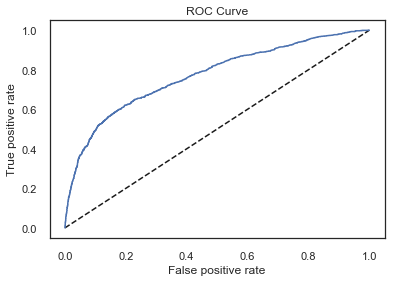

In [16]:
# Plot the ROC
fpr, tpr, _ = roc_curve(y_test, y_test_pred_forest[:,1])
plot_roc(fpr, tpr, title='ROC Curve', note='')




**PROBLEM**: Use the `print_feature_importance()` function given to you above to print the relative feature importances of this model.

In [17]:
# Print feature importance
print_feature_importance(model_forest, list(X_test.columns))



  Feature        Importance
   PAY_1          0.0963 
     ID           0.0709 
    AGE           0.0555 
 BILL_AMT1        0.0550 
 LIMIT_BAL        0.0521 
 BILL_AMT2        0.0491 
  PAY_AMT1        0.0470 
 BILL_AMT3        0.0467 
 BILL_AMT4        0.0456 
 BILL_AMT6        0.0452 
 BILL_AMT5        0.0447 
   PAY_2          0.0444 
  PAY_AMT2        0.0439 
  PAY_AMT6        0.0418 
  PAY_AMT3        0.0418 
  PAY_AMT4        0.0409 
  PAY_AMT5        0.0398 
   PAY_3          0.0281 
   PAY_4          0.0220 
   PAY_5          0.0196 
 EDUCATION        0.0180 
   PAY_6          0.0173 
 MARRIAGE_1       0.0082 
 MARRIAGE_2       0.0081 
   SEX_1          0.0079 
   SEX_2          0.0079 
 MARRIAGE_3       0.0017 
 MARRIAGE_0       0.0004 
